In [196]:
pd.set_option('display.max_rows', 50)


In [195]:
import pandas as pd

In [231]:
mva = pd.read_csv(
    "Manufacturing.csv", header=0
)

mva_d = mva.drop(columns=['Series Name', 'Series Code'])
mva_s = mva_d[:7]
mva_s['Country Name'].unique()
Countries = ['China', 'United States', 'India', 'Japan', 'Russian Federation',
       'Germany']

mva_c = mva_s[mva_s['Country Name'].isin(Countries)]
world = mva_s[mva_s['Country Name'] == 'World']


mva_u = mva_c.melt(id_vars=['Country Name', 'Country Code'],
                      var_name='Year',
                      value_name='MVA')

mva_u.columns = ['Country', 'Code', 'Year', 'MVA']

def clean_year(df):
    df.Year = df.Year.str.slice(0, 4)
    return df


mva_c = clean_year(mva_u)

world_u = world.melt(id_vars=['Country Name', 'Country Code'],
                      var_name='Year',
                      value_name=' World_MVA')

world_c = clean_year(world_u)
world_c.columns = ['Country', 'Code', 'Year', 'World_MVA']

# Extract the "World" row into a separate DataFrame
world_d = world_c.set_index('Year')['World_MVA']
mva_c['World_MVA'] = mva_c.Year.map(world_d)


cols = ['Year', 'MVA', 'World_MVA']
mva_c[cols] = mva_c[cols].apply(pd.to_numeric, errors='coerce')
mva_c['Share of global MVA'] = mva_c['MVA'] / mva_c['World_MVA']
mva_c['Share of global MVA'] = mva_c['Share of global MVA'].apply(
    lambda x: f"{x:,.5f}")

In [241]:
mva_drop = mva_c.dropna()
mva_drop.sort_values(by="Share of global MVA", ascending=False)

,Country,Code,Year,MVA,World_MVA,Share of global MVA
366,China,CHN,2021,4909020290403,16076811269678,0.30535
372,China,CHN,2022,4839978519132,16027703749811,0.30198
378,China,CHN,2023,4658781665382,16182038502639,0.28790
360,China,CHN,2020,3860697899031,13651818077199,0.28280
348,China,CHN,2018,3868482846609,14194002115876,0.27254
...,...,...,...,...,...,...
236,India,IND,1999,69651498341,6038016411236,0.01154
224,India,IND,1997,68695410075,6039780233304,0.01137
230,India,IND,1998,66233545094,5907537686927,0.01121
262,Russian Federation,RUS,2003,61829454173,6500013956766,0.00951


In [295]:
mva_drop.to_csv('../data/manufacturing_share_clean.csv', index=False)

In [259]:
cols = ['Year', 'MVA', 'World_MVA', 'Share of global MVA']
mva_drop[cols] = mva_drop[cols].apply(pd.to_numeric, errors='coerce')
mva_drop.dtypes

/tmp/ipykernel_192225/3398847556.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country                 object
Code                    object
Year                     int64
MVA                    float64
World_MVA              float64
Share of global MVA    float64
dtype: object

<Axes: xlabel='Year', ylabel='Share of global MVA'>

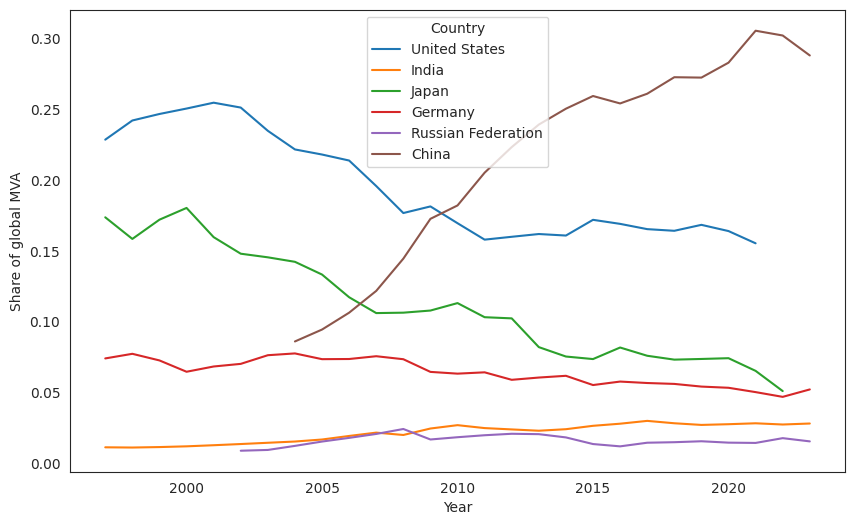

In [275]:
import seaborn as sns
sns.set_style("white")
plt.figure(figsize=(10, 6))
sns.lineplot(x="Year", y="Share of global MVA", hue="Country", data=mva_drop)

In [291]:
import plotly.express as px

Countries = ['China', 'United States', 'Japan',  'Germany']
selection = mva_drop[mva_drop['Country'].isin(Countries)]

fig = px.line(selection,
              x="Year",
              y="Share of global MVA",
              color="Country",
              title='Share of global MVA by Country')

fig.update_layout(
    xaxis_title='',
    yaxis_title='Share of global MVA',
    legend_title='Country',
    template="simple_white",
    margin=dict(l=50, r=50, t=50, b=50),
    font=dict(family="Calibri", size=14))

# Customize toolbar options
fig.show(
    config={
        'displayModeBar': True,
        'modeBarButtonsToRemove':
        ['pan', 'select', 'lasso2d', 'zoomIn', 'zoomOut'],
        'displaylogo': False
    })

# GDP 

In [1]:
import pandas as pd

In [25]:
gdp = pd.read_csv('../data/gdp_ppp_china_us.csv')
gdp_f = gdp[gdp['Series Code'] == 'NY.GDP.PCAP.PP.KD']
gdp_f

,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,China,CHN,"GDP per capita, PPP (constant 2021 internation...",NY.GDP.PCAP.PP.KD,..,..,..,..,..,..,...,13696.517495,14575.934790,15485.213005,16461.069930,17490.166730,18465.298945,18833.784703,20406.729658,21019.457231,22135.432456
2,United States,USA,"GDP per capita, PPP (constant 2021 internation...",NY.GDP.PCAP.PP.KD,..,..,..,..,..,..,...,63214.895346,64599.573736,65299.999384,66482.893439,68095.686806,69458.610183,67266.187874,71055.876194,72165.483470,73637.302789
4,Germany,DEU,"GDP per capita, PPP (constant 2021 internation...",NY.GDP.PCAP.PP.KD,..,..,..,..,..,..,...,58981.477768,59345.455625,60181.100217,61563.584091,61981.116071,62506.581559,60065.509789,61939.651585,62605.473039,61909.027309
6,Japan,JPN,"GDP per capita, PPP (constant 2021 internation...",NY.GDP.PCAP.PP.KD,..,..,..,..,..,..,...,42909.005661,43624.927453,43976.266401,44749.638212,45094.733312,44976.508077,43238.296620,44549.338341,45174.731921,46268.417232


In [26]:
gdp_c = gdp_f.drop(columns=['Series Name', 'Series Code'])
gdp_c[:4]

,Country Name,Country Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],1966 [YR1966],1967 [YR1967],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,China,CHN,..,..,..,..,..,..,..,..,...,13696.517495,14575.934790,15485.213005,16461.069930,17490.166730,18465.298945,18833.784703,20406.729658,21019.457231,22135.432456
2,United States,USA,..,..,..,..,..,..,..,..,...,63214.895346,64599.573736,65299.999384,66482.893439,68095.686806,69458.610183,67266.187874,71055.876194,72165.483470,73637.302789
4,Germany,DEU,..,..,..,..,..,..,..,..,...,58981.477768,59345.455625,60181.100217,61563.584091,61981.116071,62506.581559,60065.509789,61939.651585,62605.473039,61909.027309
6,Japan,JPN,..,..,..,..,..,..,..,..,...,42909.005661,43624.927453,43976.266401,44749.638212,45094.733312,44976.508077,43238.296620,44549.338341,45174.731921,46268.417232


In [30]:
gdp_m = gdp_c.melt(
    id_vars=['Country Name', 'Country Code'],
    var_name='Year',
    value_name='GDP pc. PPP (constant 2021 int. $)')
gdp_m

,Country Name,Country Code,Year,GDP pc. PPP (constant 2021 int. $)
0,China,CHN,1960 [YR1960],..
1,United States,USA,1960 [YR1960],..
2,Germany,DEU,1960 [YR1960],..
3,Japan,JPN,1960 [YR1960],..
4,China,CHN,1961 [YR1961],..
...,...,...,...,...
251,Japan,JPN,2022 [YR2022],45174.731921
252,China,CHN,2023 [YR2023],22135.432456
253,United States,USA,2023 [YR2023],73637.302789
254,Germany,DEU,2023 [YR2023],61909.027309


In [31]:
gdp_m['Year'] = gdp_m['Year'].str.slice(0, 4)
gdp_m

,Country Name,Country Code,Year,GDP pc. PPP (constant 2021 int. $)
0,China,CHN,1960,..
1,United States,USA,1960,..
2,Germany,DEU,1960,..
3,Japan,JPN,1960,..
4,China,CHN,1961,..
...,...,...,...,...
251,Japan,JPN,2022,45174.731921
252,China,CHN,2023,22135.432456
253,United States,USA,2023,73637.302789
254,Germany,DEU,2023,61909.027309


In [33]:
gdp_m.columns = ['Country', 'Code', 'Year', 'GDP pc. PPP (constant 2021 int. $)']

In [35]:
gdp_m

,Country,Code,Year,GDP pc. PPP (constant 2021 int. $)
0,China,CHN,1960,..
1,United States,USA,1960,..
2,Germany,DEU,1960,..
3,Japan,JPN,1960,..
4,China,CHN,1961,..
...,...,...,...,...
251,Japan,JPN,2022,45174.731921
252,China,CHN,2023,22135.432456
253,United States,USA,2023,73637.302789
254,Germany,DEU,2023,61909.027309


In [34]:
gdp_m.to_csv('../data/gdp_ppp_int2021_clean.csv')

# Gdp growth

In [36]:
gdp_growth = pd.read_csv('../data/gdp_growth.csv') 

In [41]:
gdp_gm = gdp_growth.melt(id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='GDP growth')
gdp_gm['Year'] = gdp_gm['Year'].str.slice(0, 4)
gdp_gm.columns = ['Country', 'Code', 'Year', 'GDP growth']
gdp_gm

,Country,Code,Year,GDP growth
0,China,CHN,1960,..
1,Germany,DEU,1960,..
2,Japan,JPN,1960,..
3,India,IND,1960,..
4,Russian Federation,RUS,1960,..
...,...,...,...,...
507,India,IND,2023,7.583971
508,Russian Federation,RUS,2023,3.6
509,Brazil,BRA,2023,2.90848
510,United States,USA,2023,2.5427


In [45]:
cols = ['Year',	'GDP growth']
gdp_gm[cols] = gdp_gm[cols].apply(pd.to_numeric, errors='coerce')
gdp_gm.dtypes

Country        object
Code           object
Year            int64
GDP growth    float64
dtype: object

In [46]:
gdp_gm.to_csv('../data/gdp_growth_clean.csv')

# GDP constant 2015 $

In [59]:
gdp_const = pd.read_csv('../data/worldbank_indicators/gdp_constant 2015$.csv')

gdp_const = gdp_const[:4]
# gdp_const = gdp_const.drop(columns=['Series Name', 'Country Code', 'Series Code'])
gdp_const_m = gdp_const.melt(id_vars=['Country Name'],
                        var_name='Year',
                        value_name='GDP (constant 2015 US$)')
gdp_const_m.Year = gdp_const_m.Year.str.slice(0,4)
gdp_const_m

,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,European Union,EUU,GDP (constant 2015 US$),NY.GDP.MKTP.KD,3071476147846.36,3248241322107.7,3433227252343.22,3598287726297.04,3814594637346.63,4014835317433.71,...,1.324795e+13,1.355390e+13,1.382122e+13,1.421440e+13,1.450820e+13,1.477012e+13,1.393519e+13,1.477251e+13,1.528640e+13,1.535529e+13
1,Russian Federation,RUS,GDP (constant 2015 US$),NY.GDP.MKTP.KD,..,..,..,..,..,..,...,1.390921e+12,1.363482e+12,1.366123e+12,1.391066e+12,1.430116e+12,1.461551e+12,1.422767e+12,1.502645e+12,1.471545e+12,1.524520e+12
2,China,CHN,GDP (constant 2015 US$),NY.GDP.MKTP.KD,158907448897.886,115573387577.199,109124392561.714,120364204991.728,142246417451.67,166357185215.362,...,1.033393e+13,1.106157e+13,1.181915e+13,1.264025e+13,1.349344e+13,1.429637e+13,1.461641e+13,1.585128e+13,1.632508e+13,1.717399e+13
3,United States,USA,GDP (constant 2015 US$),NY.GDP.MKTP.KD,3431221354895.04,3510139446057.61,3724257952267.13,3888125302166.88,4113636569692.57,4376909310152.89,...,1.777155e+13,1.829502e+13,1.862789e+13,1.908569e+13,1.965187e+13,2.013669e+13,1.969097e+13,2.083309e+13,2.123631e+13,2.177628e+13
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
gdp_const_m.to_csv('../data/worldbank_indicators/gdp_constant_2015_clean.csv')

# Population figures

In [86]:
# pop = pd.read_csv('../data/worldbank_indicators/Population Figures (C, R, US, EU).csv')

import pandas as pd

# Read the CSV file
pop_2 = pd.read_csv(
    "../data/worldbank_indicators/Population Figures (C, R, US, EU).csv",  # Replace with your file path
    quotechar='"',  # Handles quoted fields
    delimiter=',',  # Comma as the delimiter
    skipinitialspace=True,  # Removes extra spaces after delimiter
    engine='python',  # Use the Python engine for complex files
    on_bad_lines='skip',  # Skips bad lines (if any)
)

pop_2['Series Name'].unique()

array(['Population growth (annual %)', 'Population in largest city',
       'Population in the largest city (% of urban population)',
       'Population living in slums (% of urban population)', None,
       'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)',
       'Poverty headcount ratio at $3.65 a day (2017 PPP) (% of population)',
       'Poverty headcount ratio at $6.85 a day (2017 PPP) (% of population)',
       nan], dtype=object)

In [27]:
import wbgapi as wb
import pandas as pd

In [99]:
def get_country_names(economy_ids, index, time):

    df = wb.data.DataFrame(series=index,
                           economy=economy_ids,
                           labels=True,
                           time=time,
                           skipBlanks=True,
                           columns='series').reset_index()

    df['Year'] = df['time'].str.slice(2, 6)
    df.drop(columns=['time'], inplace=True)

    # Get the series index names
    index_names = wb.series.info(index)

    # Create a mapping for series ID to descriptive names
    index_dict = {item['id']: item['value'] for item in index_names.items}

    # Rename the index columns using the mapping
    df.rename(columns=index_dict, inplace=True)

    # Reorder the DataFrame
    df = df[['Country', 'Year'] + [index_dict.get(idx, idx) for idx in index]]

    return df

In [138]:
economy_ids = ['CHN', 'RUS', 'EUU', 'USA', 'IND']
index = ['TX.VAL.MRCH.CD.WT']
time = range(2000, 2024)

df = get_country_names(economy_ids, index, time)
df

,Country,Year,Merchandise exports (current US$)
0,China,2000,2.492030e+11
1,China,2001,2.660980e+11
2,China,2002,3.255960e+11
3,China,2003,4.382280e+11
4,China,2004,5.933260e+11
...,...,...,...
115,United States,2019,1.643161e+12
116,United States,2020,1.424935e+12
117,United States,2021,1.754300e+12
118,United States,2022,2.065157e+12


In [112]:
df.to_csv('../data/worldbank_indicators/research_expenditure.csv')
df.to_csv('../Visualizations/D3/data/research_expenditure.csv')

# Merchandise Exports 2000 and 2023

In [117]:
# wb.series.info(q='Merchandise exports')
wb.series.info('TX.VAL.MRCH.CD.WT')
# wb.economy.info()

id,value
TX.VAL.MRCH.CD.WT,Merchandise exports (current US$)
,1 elements


In [209]:
index = 'TX.VAL.MRCH.CD.WT'
time = [2000, 2023]

df = wb.data.DataFrame(series=index,
                       labels=True,
                       time=time,
                       skipBlanks=True,
                       columns='series').reset_index()

# get wb economy info
economy = wb.economy.info()

country_names = [{
    'id': item['id'],
    'name': item['value'],
    'region': item['region'],
    'incomeLevel': item['incomeLevel']
} for item in economy.items]

# change wb series to df and filter for countries only
country_names = pd.DataFrame(country_names, columns=['id', 'name', 'region', 'incomeLevel'])
countries = country_names[(country_names['region'] != '') & (country_names['incomeLevel'] !='')]

merch_export_2020 = df.query("time=='YR2000'")
merch_export_2023 = df.query("time=='YR2023'").sort_values(by=index, ascending=False)

merch_export_2020_top10 = merch_export_2020[merch_export_2020.Country.isin(countries.name)].sort_values(
    by=index, ascending=False)[:10]

merch_export_2023_top10 = merch_export_2023[merch_export_2023.Country.isin(
    countries.name)].sort_values(by=index, ascending=False)[:10]

In [240]:
def clean_wb_df(df, index):

    # Normalize index to be a list if it's a single string
    if isinstance(index, str):
        index = [index]
        
    # Ensure 'Year' is extracted from 'time' column
    if 'time' in df.columns:
        df['Year'] = df['time'].str.slice(2, 6)
        df.drop(columns=['time'], inplace=True)

    if 'Time' in df.columns:
        df.drop(columns=['Time'], inplace=True)

    index_names = wb.series.info(index)
    index_dict = {item['id']: item['value'] for item in index_names.items}
    df.rename(columns=index_dict, inplace=True)

    # Handle cases where multiple series exist
    renamed_columns = [index_dict.get(idx, idx) for idx in index]
    df = df[['Country', 'Year'] + renamed_columns]

    return df



index = 'TX.VAL.MRCH.CD.WT'
merch_export_2023_top10_clean = clean_wb_df(merch_export_2023_top10, index)
merch_export_2000_top10_clean = clean_wb_df(merch_export_2020_top10, index)

In [242]:
merch_export_2023_top10_clean = merch_export_2023_top10_clean.sort_values(
    by='Merchandise exports (current US$)', ascending=False).reset_index(drop=True)

merch_export_2023_top10_clean['Rank2023'] = merch_export_2023_top10_clean[
    'Merchandise exports (current US$)'].rank(ascending=False)

merch_export_2000_top10_clean = merch_export_2000_top10_clean.sort_values(
    by='Merchandise exports (current US$)', ascending=False).reset_index(drop=True)

merch_export_2000_top10_clean['Rank2000'] = merch_export_2000_top10_clean[
    'Merchandise exports (current US$)'].rank(ascending=False)
merch_export_2000_top10_clean

,Country,Year,Merchandise exports (current US$),Rank2000
0,United States,2000,7.819180e+11,1.0
1,Germany,2000,5.518100e+11,2.0
2,Japan,2000,4.792490e+11,3.0
3,France,2000,3.276110e+11,4.0
4,United Kingdom,2000,2.831730e+11,5.0
5,Canada,2000,2.766350e+11,6.0
6,China,2000,2.492030e+11,7.0
7,Italy,2000,2.405180e+11,8.0
8,Netherlands,2000,2.331300e+11,9.0
9,"Hong Kong SAR, China",2000,2.026830e+11,10.0


In [255]:
merch_export_2023_top10_clean

,Country,Year,Merchandise exports (current US$),Rank2023
0,China,2023,3.380024e+12,1.0
1,United States,2023,2.019542e+12,2.0
2,Germany,2023,1.688419e+12,3.0
3,Netherlands,2023,9.345680e+11,4.0
4,Japan,2023,7.173150e+11,5.0
5,Italy,2023,6.769630e+11,6.0
6,France,2023,6.484810e+11,7.0
7,"Korea, Rep.",2023,6.322260e+11,8.0
8,Mexico,2023,5.930120e+11,9.0
9,"Hong Kong SAR, China",2023,5.738710e+11,10.0


In [258]:
merged_df[:2]

,Country,Year,Merchandise exports (current US$),Rank2000,Rank2023
0,United States,2000,7.819180e+11,1.0,NaN
1,Germany,2000,5.518100e+11,2.0,NaN


In [262]:
world

,economy,time,Country,Time,TX.VAL.MRCH.CD.WT
397,WLD,YR2023,World,2023,2.390041e+13
398,WLD,YR2000,World,2000,6.487104e+12


In [273]:
# world = df[df['Country'] == 'World']
# merged_world = world[['Time', 'TX.VAL.MRCH.CD.WT']].merge(merged_df, how='inner', left_on='Time', right_on='Year')
# merged_world.drop(columns=['Time', 'Rank2000', 'Rank2023'], inplace=True)
# merged_world['% of global merch exports'] = merged_world[
#     'Merchandise exports (current US$)'] / merged_world['TX.VAL.MRCH.CD.WT']

# merged_world.drop(columns='TX.VAL.MRCH.CD.WT', inplace=True)
merged_world

,Country,Year,Merchandise exports (current US$),% of global merch exports
0,China,2023,3.380024e+12,0.141421
1,United States,2023,2.019542e+12,0.084498
2,Germany,2023,1.688419e+12,0.070644
3,Netherlands,2023,9.345680e+11,0.039103
4,Japan,2023,7.173150e+11,0.030013
5,Italy,2023,6.769630e+11,0.028324
6,France,2023,6.484810e+11,0.027133
7,"Korea, Rep.",2023,6.322260e+11,0.026453
8,Mexico,2023,5.930120e+11,0.024812
9,"Hong Kong SAR, China",2023,5.738710e+11,0.024011


In [282]:
merch_2000 = merged_world[merged_world['Year'] == '2000']
merch_2023 = merged_world[merged_world['Year'] == '2023']

In [299]:
merch_2000.columns = [
    'Country', 'Year', 'MerchEX (current US$) 2000',
    '% of global merch exports 2000'
]

merch_2023.columns = [
    'Country', 'Year', 'MerchEX (current US$) 2023',
    '% of global merch exports 2023'
]

In [303]:
merged_a = merch_2000.merge(merch_2023, how='inner', on='Country')
merged_b = merged_a.drop(columns='Year_y')
merged_c = merged_b.rename(columns={'Year_x': 'Year'})
merged_c

,Country,Year,MerchEX (current US$) 2000,% of global merch exports 2000,MerchEX (current US$) 2023,% of global merch exports 2023
0,United States,2000,7.819180e+11,0.120534,2.019542e+12,0.084498
1,Germany,2000,5.518100e+11,0.085063,1.688419e+12,0.070644
2,Japan,2000,4.792490e+11,0.073877,7.173150e+11,0.030013
3,France,2000,3.276110e+11,0.050502,6.484810e+11,0.027133
4,China,2000,2.492030e+11,0.038415,3.380024e+12,0.141421
5,Italy,2000,2.405180e+11,0.037076,6.769630e+11,0.028324
6,Netherlands,2000,2.331300e+11,0.035937,9.345680e+11,0.039103
7,"Hong Kong SAR, China",2000,2.026830e+11,0.031244,5.738710e+11,0.024011


In [304]:
merged_c.to_csv('../Visualizations/D3/data/merch_share.csv',
                    index=False)